# Step 0 - Package Import

I'm testing Positron out for this project and I've just reinstalled R 4.4.2. So that means time to manage packages.

In [1]:
list_of_packages = c("httr","tidyverse","jsonlite","glue","janitor","naniar","ggplot2")
install.packages(list_of_packages)


Installing packages into ‘C:/Users/nmshahir/AppData/Local/R/win-library/4.4’
(as ‘lib’ is unspecified)


trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.4/httr_1.4.7.zip'
Content type 'application/zip' length 503343 bytes (491 KB)
downloaded 491 KB

trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.4/tidyverse_2.0.0.zip'
Content type 'application/zip' length 431623 bytes (421 KB)
downloaded 421 KB

trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.4/jsonlite_2.0.0.zip'
Content type 'application/zip' length 1109676 bytes (1.1 MB)
downloaded 1.1 MB

trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.4/glue_1.8.0.zip'
Content type 'application/zip' length 184305 bytes (179 KB)
downloaded 179 KB

trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.4/janitor_2.2.1.zip'
Content type 'application/zip' length 292965 bytes (286 KB)
downloaded 286 KB

trying URL 'https://cran.rstudio.com/bin/windows/contrib/4.4/naniar_1.1.0.zip'
Content type 'application/zip' length 2768996 bytes (2.6 MB)
downloaded 2.6 MB

trying URL 'https://cran.rstudio.com/bin/windows

package ‘httr’ successfully unpacked and MD5 sums checked
package ‘tidyverse’ successfully unpacked and MD5 sums checked
package ‘jsonlite’ successfully unpacked and MD5 sums checked


package ‘glue’ successfully unpacked and MD5 sums checked


package ‘janitor’ successfully unpacked and MD5 sums checked
package ‘naniar’ successfully unpacked and MD5 sums checked
package ‘ggplot2’ successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nmshahir\AppData\Local\Temp\RtmpaiaeZR\downloaded_packages


Warning messages:
1: In file.copy(savedcopy, lib, recursive = TRUE) :
  problem copying C:\Users\nmshahir\AppData\Local\R\win-library\4.4\00LOCK\jsonlite\libs\x64\jsonlite.dll to C:\Users\nmshahir\AppData\Local\R\win-library\4.4\jsonlite\libs\x64\jsonlite.dll: Permission denied
2: In file.copy(savedcopy, lib, recursive = TRUE) :
  problem copying C:\Users\nmshahir\AppData\Local\R\win-library\4.4\00LOCK\glue\libs\x64\glue.dll to C:\Users\nmshahir\AppData\Local\R\win-library\4.4\glue\libs\x64\glue.dll: Permission denied


In [2]:
library(httr)
library(tidyverse)
library(jsonlite)
library(glue)
library(janitor)
library(naniar)
library(ggplot2)

Warning message:
package ‘httr’ was built under R version 4.4.3 


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the ]8;;http://conflicted.r-lib.org/conflicted package]8;; to force all conflicts to become errors


Warning messages:
1: package ‘tidyverse’ was built under R version 4.4.3 
2: package ‘ggplot2’ was built under R version 4.4.3 
3: package ‘purrr’ was built under R version 4.4.3 



Attaching package: ‘jsonlite’

The following object is masked from ‘package:purrr’:

    flatten



Warning message:
package ‘jsonlite’ was built under R version 4.4.3 



Attaching package: ‘janitor’

The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Warning message:
package ‘janitor’ was built under R version 4.4.3 
Warning message:
package ‘naniar’ was built under R version 4.4.3 


# Step 1 - Data Import
For this we're going to pull the cleaned data from the Tidy Tuesday repo.

In [4]:
parfumo_data_clean <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-12-10/parfumo_data_clean.csv')
glimpse(parfumo_data_clean)

Rows: 59325 Columns: 13
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (10): Number, Name, Brand, Concentration, Main_Accords, Top_Notes, Middle_Notes, Base_Notes, Perfumers, URL
dbl  (3): Release_Year, Rating_Value, Rating_Count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 59,325
Columns: 13
$ Number        <chr> "455", "0071", "0154", "0162", "0171", "0191", "02", "03", "047", "069", "09", "1", "10", "101", "102", "103", "104", "105", "106", "108", "11",…
$ Name          <chr> "Tabac Écarlate", "Tidal Pool", "Pumpkin Pie", "Wet Stone", "Chocolate Box", "My Birthday Cake", "Coco.Conut", "Baby Green Tea", "Beautiful Laun…
$ Brand         <chr> "Le Ré Noir", "CB I Hate Perfume", "CB I Hate Perfume", "CB I Hate Perfume", "CB I Hate Per

This data came with a data dictionary as seen below.
### Data Dictionary
#### `parfumo_data_clean.csv`

|variable      |class       |description                                                                      |
|:-------------|:-----------|:--------------------------------------------------------------------------------|
|Number        |character   |A unique identifier or number assigned to each perfume.                          |
|Name          |character   |The name of the perfume or fragrance.                                            |
|Brand         |character   |The brand or manufacturer of the fragrance.                                      |
|Release_Year  |double      |The year the fragrance was released.                                             |
|Concentration |character   |The concentration of the fragrance (e.g., Eau de Parfum, Eau de Toilette).       |
|Rating_Value  |double      |The overall rating score given by users.                                         |
|Rating_Count  |double      |The number of user ratings for the fragrance.                                    |
|Main_Accords  |character   |The primary scent characteristics or accords of the fragrance.                   |
|Top_Notes     |character   |The initial scent notes perceived after application.                             |
|Middle_Notes  |character   |The heart or middle notes of the fragrance that emerge after the top notes fade. |
|Base_Notes    |character   |The lasting, final scent notes that linger after the fragrance has dried down.   |
|Perfumers     |character   |The creators or perfumers responsible for the fragrance composition.             |
|URL           |character   |The link to the product page on Parfumo.com.                                     |

# Step 2  Data Cleaning

While is this "tidy" data, this is we can definitely clean it up a tad bit more! In particular, the information regarding the components of the scents seem to vary between 1 or multiple characteristics or notes. So, lets try to break those into individual observations as well.

In [15]:
parfumo_data_all_notes <- parfumo_data_clean %>%
  pmap(list("Main_Accords","Top_Notes"), separate_row(sep = ", "))
    #separate_rows(Main_Accords,sep = ", ") %>%
    #separate_rows()
head(parfumo_data_all_notes)

: [1m[33mError[39m in `pmap()`:[22m
[1m[22m[36mℹ[39m In index: 1.
[1mCaused by error in `UseMethod()`:[22m
[33m![39m no applicable method for 'separate_rows' applied to an object of class "NULL"

In [12]:
parfumo_data_all_notes <- parfumo_data_clean %>%
    separate_rows(Main_Accords,sep = ", ") %>%
    separate_rows()

head(parfumo_data_all_notes,10)

# A tibble: 10 × 13
   Number Name             Brand             Release_Year Concentration Rating_Value Rating_Count Main_Accords Top_Notes Middle_Notes     Base_Notes     Perfumers URL  
   <chr>  <chr>            <chr>                    <dbl> <chr>                <dbl>        <dbl> <chr>        <chr>     <chr>            <chr>          <chr>     <chr>
 1 455    Tabac Écarlate   Le Ré Noir                  NA NA                      NA           NA NA           NA        NA               NA             Valery S… http…
 2 0071   Tidal Pool       CB I Hate Perfume         2004 NA                      NA           NA NA           Bergamot  French lavender  Musk, Foulness Harry Fr… http…
 3 0154   Pumpkin Pie      CB I Hate Perfume         1998 NA                      NA           NA Green        NA        NA               NA             NA        http…
 4 0154   Pumpkin Pie      CB I Hate Perfume         1998 NA                      NA           NA Leathery     NA        NA            

Now that we have our data uploaded, we can start some EDA.
First, lets get an idea of the ratings look like for this dataset as a whole.

In [4]:
parfumo_data_ratings <- parfumo_data_clean %>%
	filter(!is.na(Rating_Value)) %>%
	filter(!is.na(Rating_Count))

glimpse(parfumo_data_ratings)

Rows: 30,046
Columns: 13
$ Number        <chr> "101", "102", "104", "105", "108", "164", "205", "220", …
$ Name          <chr> "At The Beach 1966", "Winter 1972", "Greenbriar 1968", "…
$ Brand         <chr> "CB I Hate Perfume", "CB I Hate Perfume", "CB I Hate Per…
$ Release_Year  <dbl> NA, NA, 2002, 2008, 2007, 1971, 1996, 2003, NA, 2004, 20…
$ Concentration <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ Rating_Value  <dbl> 7.8, 7.5, 7.3, 7.8, 7.8, 7.3, 7.0, 7.3, 8.5, 7.9, 8.4, 8…
$ Rating_Count  <dbl> 2, 2, 27, 16, 2, 305, 92, 450, 2, 15, 9, 6, 16, 2, 33, 3…
$ Main_Accords  <chr> NA, "Green, Spicy, Earthy, Floral, Sweet", "Earthy, Resi…
$ Top_Notes     <chr> "Frankincense, Orange zest, Pimento, Brine", NA, NA, "Me…
$ Middle_Notes  <chr> "Cypriol, Lavender, Saffron, Spices, Staleness", NA, NA,…
$ Base_Notes    <chr> "Amber, Benzoin, Cedarwood, Frankincense, Gaiac wood, Gu…
$ Perfumers     <chr> NA, NA, "Patricia Choux", "Christèle Jacquemin Perfume m…
$ URL          

While we have 59325 perfumes in this dataset, only 30,046 of them have a value for average rating and the number of ratings associated with that perfume.
Lets see what the distribution looks like of perfume ratings looks like.

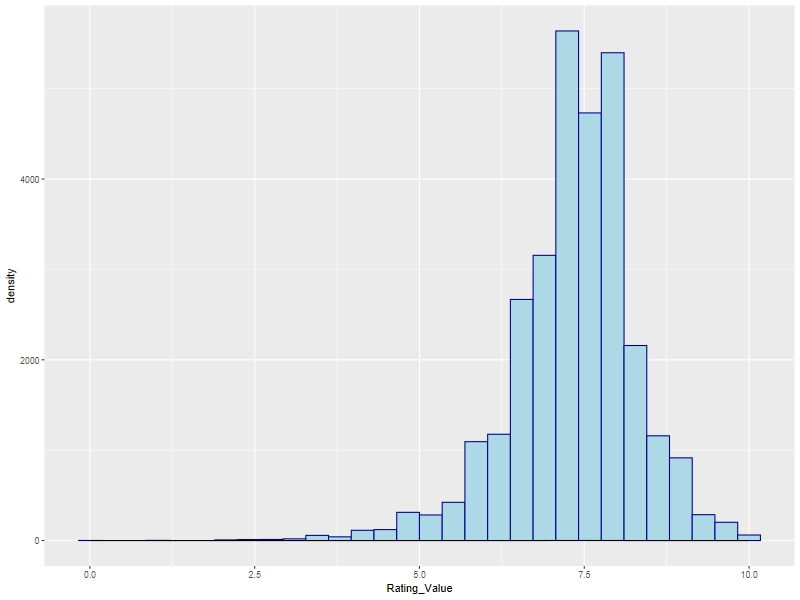

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

In [21]:
perfume_ratings_histo <- parfumo_data_ratings %>%
    ggplot(aes(x=Rating_Value)) +
        geom_histogram(color = "darkblue", fill = "lightblue")

perfume_ratings_histo

This shows us that the range of Rating Values is between 0 and 10 and the mean Rating Value is probably around 7.4.

In [27]:
parfumo_data_ratings %>%
  select(Rating_Value) %>%
  summary()

  Rating_Value   
 Min.   : 0.000  
 1st Qu.: 6.900  
 Median : 7.400  
 Mean   : 7.347  
 3rd Qu.: 7.900  
 Max.   :10.000  

As we see from the summary stats, the mean Rating Value is around 7.34, so fairly close!

## Demographic Filtering
There are multiple types of reco

Before we start digging into the text-based data aspect of this dataset, lets encode an additional variable that classifies a perfume's rating value as "positive" or "negative".

In [39]:
#We'll classify perfumes with an average rate of 7.3 or greater as "Positive", and under 7.3 as "negative".

parfumo_data_ratings_binary<- parfumo_data_ratings %>%
    mutate(Rating_Binary = case_when(
      Rating_Value >= 7.3 ~ "Positive",
      Rating_Value < 7.3 ~ "Negative"
    ))
head(parfumo_data_ratings_binary,7)

# A tibble: 7 × 14
  Number Name         Brand Release_Year Concentration Rating_Value Rating_Count
  <chr>  <chr>        <chr>        <dbl> <chr>                <dbl>        <dbl>
1 101    At The Beac… CB I…           NA NA                     7.8            2
2 102    Winter 1972  CB I…           NA NA                     7.5            2
3 104    Greenbriar … CB I…         2002 NA                     7.3           27
4 105    I am a Dand… CB I…         2008 NA                     7.8           16
5 108    On A Clear … CB I…         2007 NA                     7.8            2
6 164    À L'Apogée … Le R…         1971 NA                     7.3          305
7 205    7 Billion H… CB I…         1996 NA                     7             92
# ℹ 7 more variables: Main_Accords <chr>, Top_Notes <chr>, Middle_Notes <chr>,
#   Base_Notes <chr>, Perfumers <chr>, URL <chr>, Rating_Binary <chr>

In [40]:
#Lets also remove any perfume that doesn't have information regarding Main Accords, as well as top, middle, and base notes.
parfumo_data_ratings_all_notes <- parfumo_data_ratings_binary %>%
    filter(!is.na(Main_Accords)) %>%
    filter(!is.na(Top_Notes)) %>%
    filter(!is.na(Middle_Notes)) %>%
    filter(!is.na(Base_Notes))

glimpse(parfumo_data_ratings_all_notes)

Rows: 19,341
Columns: 14
$ Number        <chr> "105", "108", "164", "205", "26", "27", NA, NA, NA, NA, …
$ Name          <chr> "I am a Dandelion", "On A Clear Day You Can See Forever"…
$ Brand         <chr> "CB I Hate Perfume", "CB I Hate Perfume", "Le Ré Noir", …
$ Release_Year  <dbl> 2008, 2007, 1971, 1996, NA, 2004, 2024, NA, NA, 2018, 20…
$ Concentration <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, "Eau de Toilette…
$ Rating_Value  <dbl> 7.8, 7.8, 7.3, 7.0, 8.5, 7.9, 8.4, 8.8, 6.5, 7.5, 5.1, 6…
$ Rating_Count  <dbl> 16, 2, 305, 92, 2, 15, 9, 2, 33, 41, 11, 20, 44, 24, 19,…
$ Main_Accords  <chr> "Sweet, Gourmand, Green, Spicy, Resinous", "Smoky, Sweet…
$ Top_Notes     <chr> "Meringue, Magnolia, Myrrh", "Cardamom, Pink pepper", "B…
$ Middle_Notes  <chr> "Parsley, Clove, Cypriol", "Juniper, Vanilla, Quarklox",…
$ Base_Notes    <chr> "Green vanilla, White oud, Nausea", "Cypress, Frankincen…
$ Perfumers     <chr> "Christèle Jacquemin Perfume maker", NA, "Roger Pellégri…
$ URL          

### What are we smelling?
What are the various scents that are being identified in these perfumes? What is the avarage number of terms used to describe the perfumes between "Postive" and "Negative" rated perfumes?? Is there a frequency of terms used?

In [64]:
perfume_notes <- parfumo_data_ratings_all_notes %>%
  mutate(scent_count_base_notes = lengths(strsplit(Base_Notes,",")),
         scent_count_main_accords = lengths(strsplit(Main_Accords,",")),
         scent_count_top_notes = lengths(strsplit(Top_Notes,",")),
         scent_count_middle_notes = lengths(strsplit(Middle_Notes,",")))

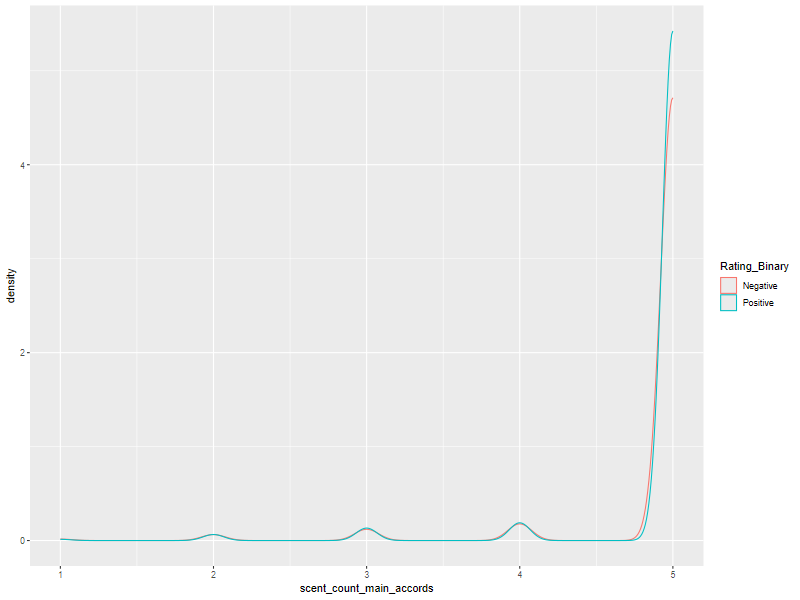

In [87]:
perfume_main_accords <- perfume_notes %>%
    ggplot(aes(x = scent_count_main_accords, color = Rating_Binary)) +
      geom_density( alpha = 0.5, position = "identity")

perfume_main_accords

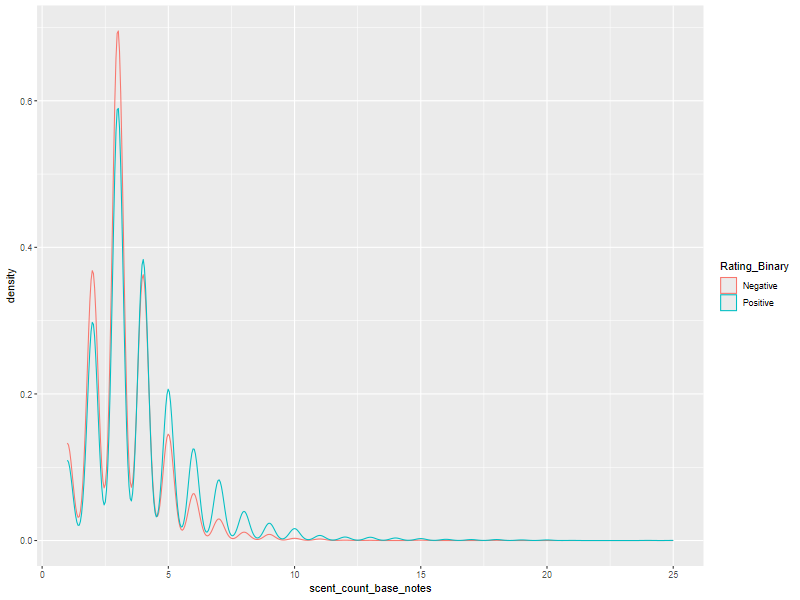

In [88]:
perfume_base_notes <- perfume_notes %>%
    ggplot(aes(x = scent_count_base_notes, color = Rating_Binary)) +
      geom_density(alpha = 0.5, position = "identity")

perfume_base_notes

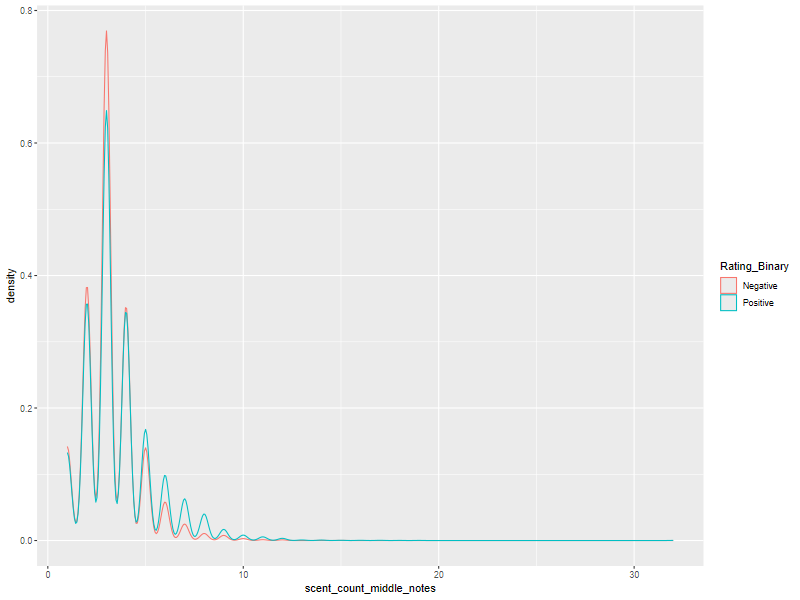

In [86]:
perfume_middle_notes <- perfume_notes %>%
    ggplot(aes(x = scent_count_middle_notes, color = Rating_Binary)) +
      geom_density( alpha = 0.5, position = "identity")

perfume_middle_notes

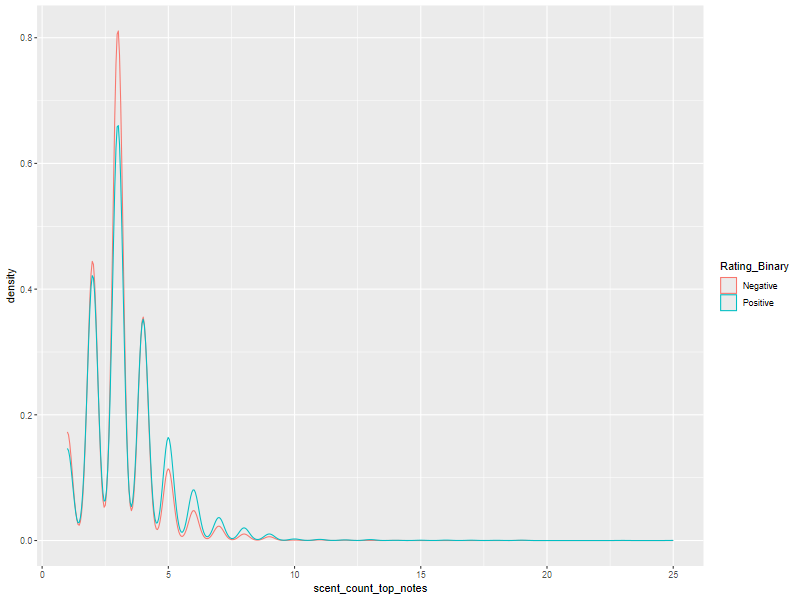

In [89]:
perfume_top_notes <- perfume_notes %>%
    ggplot(aes(x = scent_count_top_notes, color = Rating_Binary)) +
      geom_density( alpha = 0.5, position = "identity")

perfume_top_notes

In [66]:
glimpse(perfume_notes$Top_Notes)

 chr [1:19341] "Meringue, Magnolia, Myrrh" "Cardamom, Pink pepper" ...


In [54]:
strsplit(parfumo_data_ratings_all_notes$Base_Notes,",")

[[1]]
[1] "Green vanilla" " White oud"    " Nausea"      

[[2]]
[1] "Cypress"       " Frankincense" " Musk"        

[[3]]
[1] "Cistus"    " Labdanum"

[[4]]
[1] "Oakmoss"    " Cashmere"  " Patchouli"

[[5]]
[1] "Tonka bean" " Vetiver"  

[[6]]
[1] "Vanilla"    " Musk"      " Patchouli"

[[7]]
[1] "Oakmoss"  " Musk"    " Vanilla"

[[8]]
[1] "Amberwood" " Cedar"    " Chestnut" " Vanilla" 

[[9]]
[1] "Labdanum" " Sock"   

[[10]]
[1] "Ambergris" " Vanilla"  " Sand"    

[[11]]
[1] "Cedarwood"   " Musk"       " Sandalwood"

[[12]]
[1] "Cedarwood" " Leather"  " Vanilla" 

[[13]]
[1] "White musk"  " Tonka bean" " Patchouli" 

[[14]]
[1] "Frankincense" " Gaiac wood"  " Sandalwood" 

[[15]]
[1] "Amberwood" " Musk"     " Oakmoss" 

[[16]]
[1] "Amber"       " Musk"       " Sandalwood" " Tonka bean"

[[17]]
[1] "Sandalwood"       " Musk"            " Vanilla praliné"

[[18]]
[1] "Leathery notes" " Cedarwood"     " Musk"          " Tonka bean"   

[[19]]
[1] "Amber"       " Sandalwood" " Tonka b

In [53]:
lengths(strsplit(parfumo_data_ratings_all_notes$Base_Notes,","))

   [1]  3  3  2  3  2  3  3  4  2  3  3  3  3  3  3  4  3  4  4  5  2  5  2  2
  [25]  3  3  3  3  5  3  4  3  3  3  2  5  5  5  4  3  3  6  7  4  3  4  3  3
  [49]  4  3  3  4  3  4  3  3  3  3  3  3  3  3  2  4  2  3  4  4  3  4  1  3
  [73]  3  2  3  4  4  4  3  2  2  2  3  3  5  4  5  5  4  3  3  3  4  4  3  3
  [97]  3  4  2  2  2  2  5  9  4  4  3  3  2  3  3  3  5  3  4  3  2  5  4  4
 [121]  3  2  3  4  2  3  1  3  4  2  4  4  6  7  3  5  3  7  3  3  3  3  3  5
 [145]  4  6  5  5  2  5  3  2  1  6  6  7  6  1  8  3  4  4  5  2  3  3  4  3
 [169]  2  2  2  2  2  3  4  3  2  3  3  5  2  1  3  3  3  3  2  3  3  4  5  4
 [193]  3  2  3  2  2  3  3  4  3  2  2  3  2  3  1  2  2  2  3  3  3  1  2  2
 [217]  2  2  2  3  2  3  3  7  2  4  3  3  3  3  3  1 10 10 10  2  4  3  3  3
 [241]  5  3  3  6 11  3  1  4  4  3  4  6  3  3  3  3  2  3  2  4  3  3  5  5
 [265]  4  5  2  4  3  4  4  3  5  2  5  3  6  2  2  2  3  3  3  3 11  1  2  1
 [289]  2  1  2  5  3  3  2  2  2  3  3  4  5  4  2 